<a href="https://colab.research.google.com/github/Avuraedor/Avuraedor/blob/main/PROJECT_Regression_Model_that_can_Predict_Insurance_Charges_By_Avura_Edor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [52]:
df = pd.read_csv('/content/US HEALTH insurance.csv')


# DATA CLEANING

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
## Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# Check to understand the structure & essential characteristics of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [14]:
# Check for important descriptive statistics to help understand the
# characteristics of the dataset

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# DATA VISUALIZATION

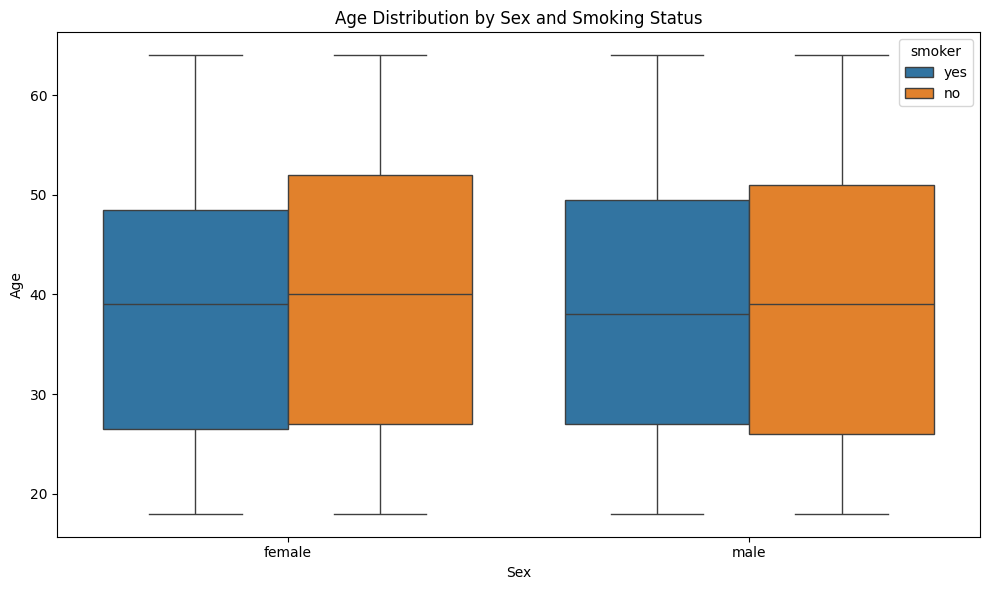

In [25]:
# Age distribution by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df, hue='smoker')
plt.title('Age Distribution by Sex and Smoking Status')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.tight_layout()
plt.show()




# Insights from the above boxplot:
-In both Females and Males, the number of non-smokers is significantly higher than the number of smokers. This indicates a general trend of non-smoking being more prevalent across certain Age-Bracket.

-It is also evidenced that the number of 'Male' smokers is slightly higher than the Female smokers within the age-braket 22 to 52, while for non-smokers, the female is higher than the male non-smokers

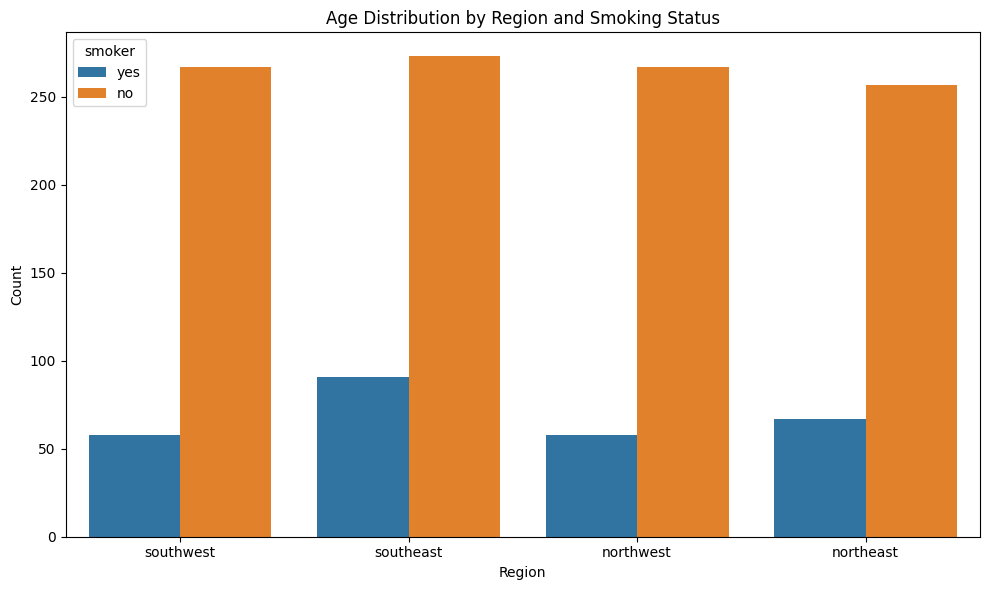

In [22]:
# Age distribution by region and smoking status
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, hue='smoker')
plt.title('Age Distribution by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

From the above chart, you will observe the following;

-The x-axis shows different regions - southwest, southeast, northwest, and northeast.

-The bars are color-coded to differentiate between smokers (blue) and non-smokers (orange), as indicated by the legend.

-The y-axis represents the count of individuals in each category.

# Insights:

-In all regions, the number of non-smokers is significantly higher than the number of smokers. This indicates a general trend of non-smoking being more prevalent across all regions.

-Southwest: The count of smokers is relatively low compared to non-smokers.

-Southeast: This region has the highest count of smokers compared to the other regions, though non-smokers still outnumber smokers.

-Northwest: Similar to the southwest, the northwest also has a lower count of smokers.

-Northeast: The pattern is consistent with the southwest and northwest, showing a lower count of smokers.

-The counts of non-smokers across all regions are quite similar, suggesting that the prevalence of non-smoking is consistent across different regions.

# Further Detailed Analysis reveals that:
 -The southeast region stands out with a notably higher number of smokers compared to other regions. This might warrant further investigation to understand underlying factors such as cultural, socioeconomic, or policy influences in this region

 -Both the southwest and northwest regions show a lower number of smokers, indicating these regions might have effective anti-smoking campaigns or policies, or different cultural attitudes towards smoking.

 -There is a consistency of high number of non-smokers across all regions which suggests that non-smoking is the dominant behavior, which is a positive public health indicator.

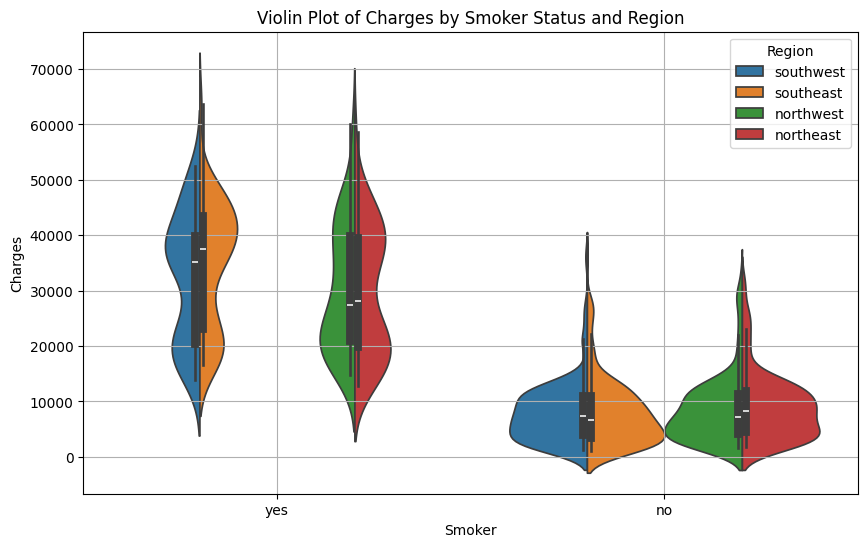

In [36]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='charges', data=df, hue='region', split=True)
plt.title('Violin Plot of Charges by Smoker Status and Region')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.legend(title='Region')
plt.grid(True)
plt.show()

# From the above Violin plot, the following INSIGHTS can be deduced ranging from Impact of Smoking on Charges, Regional Disparities, & Outliers and Skewness

-Smokers generally have a wider distribution of charges compared to non-smokers, indicating higher variability in healthcare costs associated with smoking. This suggests that smoking tends to be associated with higher medical expenses across different regions.

-There are noticeable differences in the distribution of charges across regions, both for smokers and non-smokers. Some regions show higher median charges and wider distributions, which could reflect differences in healthcare policies, access to healthcare, or regional health demographics.

-Outliers within the violin plots, especially those extending beyond the main body of the plot, indicate individuals with exceptionally high healthcare costs. These outliers could represent cases of severe health conditions or expensive treatments, impacting overall healthcare expenditures

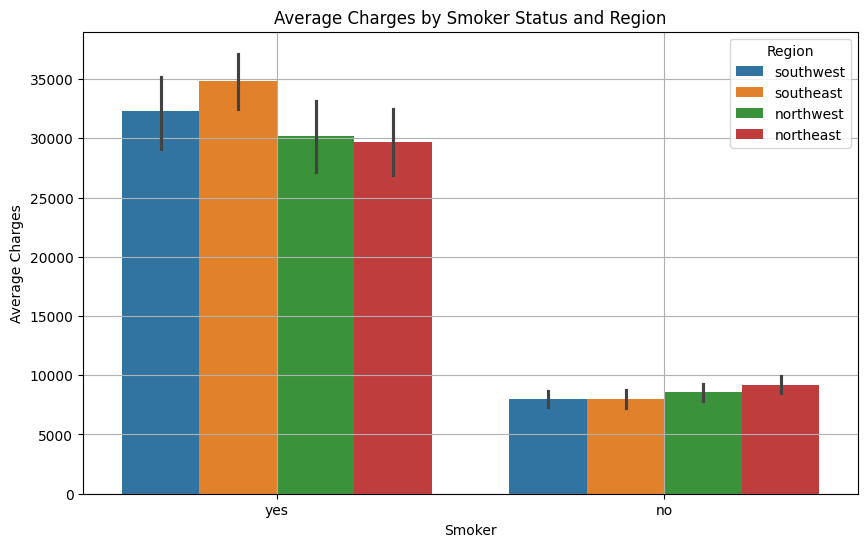

In [38]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', data=df, hue='region')
plt.title('Average Charges by Smoker Status and Region')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.legend(title='Region')
plt.grid(True)
plt.show()

# Several insights can be deduced from above Bar Chart.

-Smokers generally incur higher average healthcare charges compared to non-smokers across all regions. This underscores the significant financial burden associated with smoking-related healthcare needs as shown on the left-hand-side of the graph.

-There are noticeable variations in average charges across different regions, both for smokers and non-smokers. Some regions consistently show higher average charges, which may reflect differences in healthcare infrastructure, treatment costs, or population health factors.

-Disparities in average charges between regions suggest varying levels of healthcare access, quality of care, or public health interventions. Regions with lower charges may have more effective preventive health measures or healthcare management strategies in place.

# Recommendation

-Policymakers can use these insights to target healthcare interventions more effectively. For instance, regions with higher average charges for smokers may benefit from enhanced smoking cessation programs or targeted public health campaigns aimed at reducing smoking rates.

-Investing in preventive measures and early intervention programs targeted at smoking cessation could potentially lead to long-term cost savings by reducing the incidence of smoking-related diseases and associated healthcare costs.

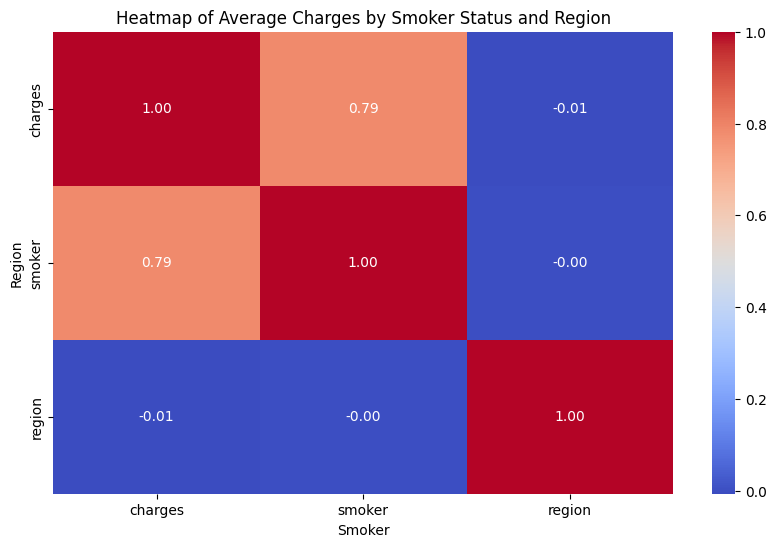

In [50]:
# Heatmap
df_corr = df[['charges', 'smoker','region']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Average Charges by Smoker Status and Region')
plt.xlabel('Smoker')
plt.ylabel('Region')
plt.show()

# Insights from the above shows the following;

-There is a strong positive correlation (0.79) between charges and smoker. This suggests that being a smoker is strongly associated with higher charges.

-The correlation between charges and region is very close to zero (-0.01), indicating no significant linear relationship between these two variables. Region does not appear to have a meaningful impact on charges.

-The correlation between smoker and region is also nearly zero (-0.00). This implies that the smoking status is not significantly associated with the region.


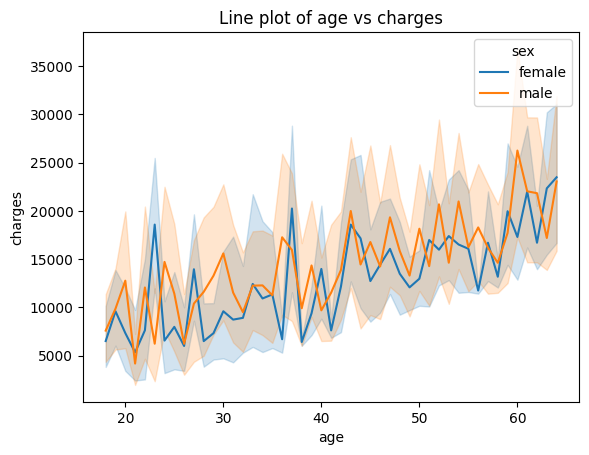

In [19]:
sns.lineplot(x='age', y='charges', data=df, hue='sex')
plt.title('Line plot of age vs charges' )
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

# Insights from the above shows the following;

-Both lines (for male and female) generally show an increasing trend as age increases. Meaning, age for both sex is directly proportional to charges, which suggests that healthcare charges tend to rise with age.

-The lines for male (orange) and female (blue) often overlap, indicating that, on average, charges for males and females are quite similar. However, there are certain age ranges where the lines diverge.

-The shaded areas around the lines represent the confidence intervals (or variability) of the charges. The blue shaded area (females) seems wider at some points, indicating higher variability in charges for females in those age ranges (28-38, 43-50 & 50 - 58).

In [53]:
# Encode the categorical code

cat_col = ('sex', 'smoker', 'region')
from sklearn.preprocessing import LabelEncoder

In [54]:
# Iterate ==> Fit ==> Transform

for col in cat_col:
    # Create an object
    enc = LabelEncoder()

    # Fit
    enc.fit(df[col])

    # Tansform
    df[col] = enc.transform(df[col])

In [55]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.924


# Feature Engineering

In [56]:
# Split the data
# I am dropping 'Charges' because it is considered my Target Variable\
# meaning, what I intend to predict

from sklearn.model_selection import train_test_split

# x is our independent variable (feature)
x=df.drop(['charges'], axis=1)

# y is our dependent variable (label)
y= df['charges']

# Split in 75:25
# Train Set ===> x_train, y_train
# Test Set ===> x_test, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [58]:
df.shape

(1338, 7)

In [59]:
x_train.shape

(1003, 6)

In [60]:
0.75*1338

1003.5

# With Scaling

In [61]:
# Scale

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [62]:
linreg = LinearRegression()

linreg.fit(x_train_scaled, y_train)

LinearRegression()

In [63]:
linreg.score(x_test_scaled, y_test)

0.7397857862753918

In [64]:
linreg = LinearRegression()

linreg.fit(x_train, y_train
          )
linreg.score(x_test, y_test)

0.7397857862753923

# Without Scaling

In [75]:
linreg.fit(x_train, y_train)

LinearRegression()

In [76]:
# Evaluate model accuracy on test set
linreg.score(x_test, y_test)

0.7397857862753923

In [81]:
Unscaled = 0.7397857862753923
Scaled = 0.7397857862753918

Scaled < Unscaled

True

In [69]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [82]:
linreg.predict([[19, 0, 27.90, 0, 1, 3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25655.96551075])

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
# Fetch the predictions on the test set

preds = linreg.predict(x_test)

In [72]:
# MSE

print(mean_squared_error(y_test, preds))

38402647.53552725
